In [1]:
import numpy as np 
import pandas  as pd
import matplotlib.pyplot as plt
np.random.seed(3)

In [2]:
data_path="tvmarketing.csv"
adv=pd.read_csv(data_path)

In [3]:
adv_norm=(adv-np.mean(adv))/np.std(adv) 

c:\Users\Tunar\Documents\MyCode\Tunar\venv\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<Axes: xlabel='TV', ylabel='Sales'>

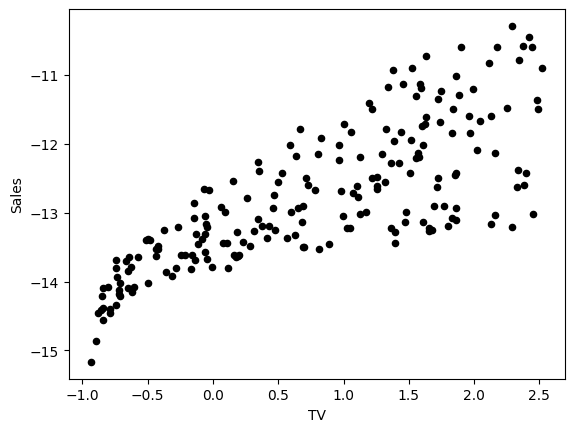

In [4]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

In [5]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

In [6]:
def layer_sizes(X, Y):
    n_x = X.shape[0]  
    n_y = Y.shape[0]  
    return (n_x, n_y)
(n_x, n_y) = layer_sizes(X_norm, Y_norm)


In [14]:
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01  
    b = np.zeros((n_y, 1))  
    parameters={"W": W,"b": b}
    return parameters
parameters = initialize_parameters(n_x, n_y)
parameters

{'W': array([[0.00096497]]), 'b': array([[0.]])}

In [15]:
def forward_propagation(X, parameters):
    W = parameters['W']
    b = parameters['b']
    Z = np.matmul(W, X) + b
    Y_hat= Z

    return Y_hat


Y_hat = forward_propagation(X_norm, parameters)

In [9]:
def compute_cost(Y_hat, Y):
    m = Y.shape[1]
    cost = (1/(2*m)) * np.sum((Y_hat - Y)**2)
    return cost

In [10]:
def backward_propagation(Y_hat, X, Y):
    m = Y.shape[1]


    dZ = Y_hat - Y
    dW = (1/m) * np.matmul(dZ, X.T)
    print(X.shape)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    grads = {"dW": dW,"db": db}
    return grads

In [11]:
grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

(1, 200)
dW = [[9.1714438]]
db = [[12.79347054]]


In [16]:
def update_parameters(parameters, grads, learning_rate=0.01):
    W = parameters['W']
    b = parameters['b']

    dW = grads['dW']
    db = grads['db']

    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {"W": W,"b": b}
    return parameters
parameters = update_parameters(parameters, grads, learning_rate=0.01)

In [17]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    for i in range(0, num_iterations):
         

        Y_hat = forward_propagation(X, parameters)
        cost = compute_cost(Y_hat, Y)
        
        grads = backward_propagation(Y_hat, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
parameters = nn_model(X_norm, Y_norm, num_iterations=1000, learning_rate=0.01, print_cost=True)

(1, 200)
Cost after iteration 0: 82.126402
(1, 200)
Cost after iteration 1: 79.682988
(1, 200)
Cost after iteration 2: 77.333271
(1, 200)
Cost after iteration 3: 75.073383
(1, 200)
Cost after iteration 4: 72.899617
(1, 200)
Cost after iteration 5: 70.808423
(1, 200)
Cost after iteration 6: 68.796400
(1, 200)
Cost after iteration 7: 66.860290
(1, 200)
Cost after iteration 8: 64.996969
(1, 200)
Cost after iteration 9: 63.203449
(1, 200)
Cost after iteration 10: 61.476864
(1, 200)
Cost after iteration 11: 59.814469
(1, 200)
Cost after iteration 12: 58.213635
(1, 200)
Cost after iteration 13: 56.671842
(1, 200)
Cost after iteration 14: 55.186677
(1, 200)
Cost after iteration 15: 53.755827
(1, 200)
Cost after iteration 16: 52.377077
(1, 200)
Cost after iteration 17: 51.048304
(1, 200)
Cost after iteration 18: 49.767474
(1, 200)
Cost after iteration 19: 48.532639
(1, 200)
Cost after iteration 20: 47.341931
(1, 200)
Cost after iteration 21: 46.193563
(1, 200)
Cost after iteration 22: 45.08581